# Finding Donors for *CharityML*
## EDA: bivariate
### Kebei Jiang 05/31/2019

### Goal

The goal of this notebook is to do initial EDA of the data. This is the part for bivariate. Here is a nice [intro](https://www.saedsayad.com/bivariate_analysis.htm) to follow. I also tried to use as little _seaborn_ as possible.

-----

### 0, data head and description

In [29]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
%matplotlib inline

sns.set(color_codes=True)

In [30]:
# Load the Census dataset
data = pd.read_csv("census.csv")
ft_num = data.select_dtypes(include=['int64','float64']).columns.values
ft_cat = data.select_dtypes(exclude=['int64','float64']).columns.values
#print(ft_num)
#print(ft_cat)

-------

### 3.a, bivariate analysis: continuous vs continuous

In [31]:
ft_num

array(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'], dtype=object)

In [32]:
data['income_binary'] = data['income'].map(lambda x: 0 if x == '<=50K' else 1)

In [33]:
# first we can look at the correlations between numerical features

data['income_binary'] = data['income'].map(lambda x: 0 if x == '<=50K' else 1)
corr = data[np.append(ft_num, 'income_binary')].corr()
corr.style.background_gradient(cmap='Accent')

<Figure size 1440x432 with 0 Axes>

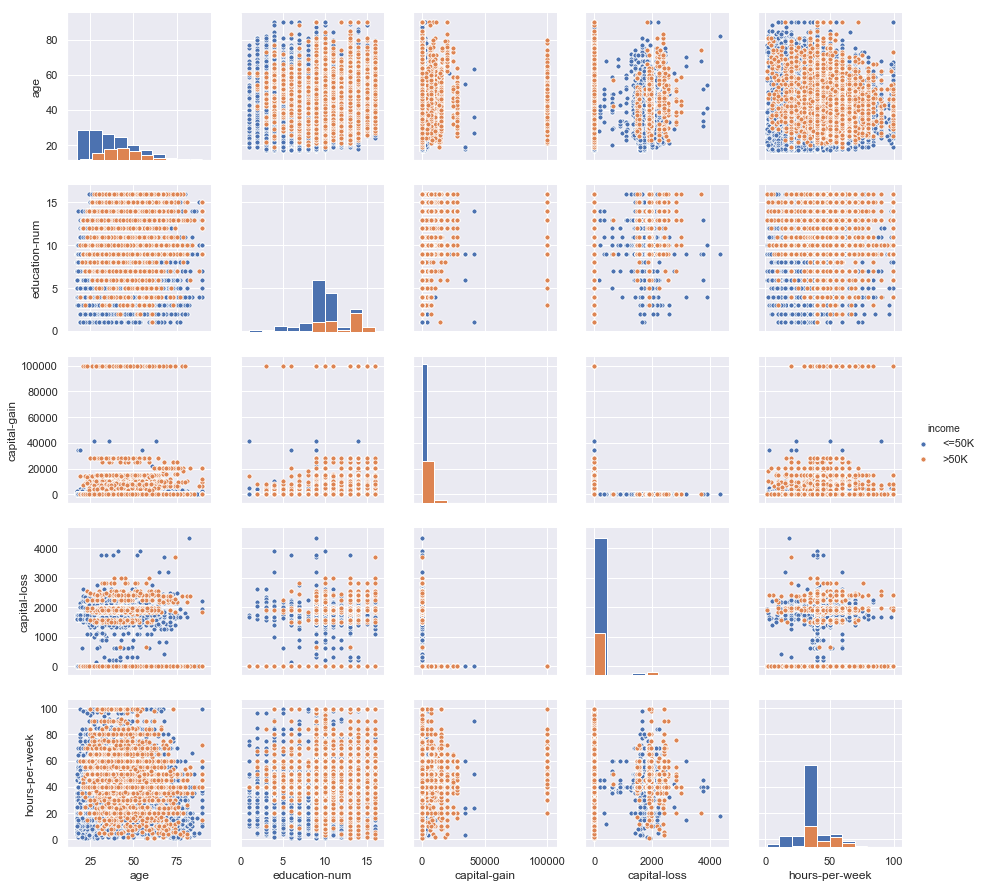

In [34]:
# then we can plot the scattering plot to see if any pattern exists between any two numerical features
# the data is color-coded by income classes

fig = plt.figure(figsize = (20,6))
sns.pairplot(data[np.append(ft_num, 'income')], diag_kind = 'hist', hue='income', plot_kws={"s": 25})
# kws is for all keyword arguments, very useful!
plt.show()

**Observations**  
 * no obvious linear correlations between numerical features  
 * no obvious patterns observed beween numerical features  

### 3.b, bivariate analysis: [categorical vs numerical](https://www.saedsayad.com/categorical_numerical.htm)  

###  ages vs incomes

Text(0, 0.5, 'percentage')

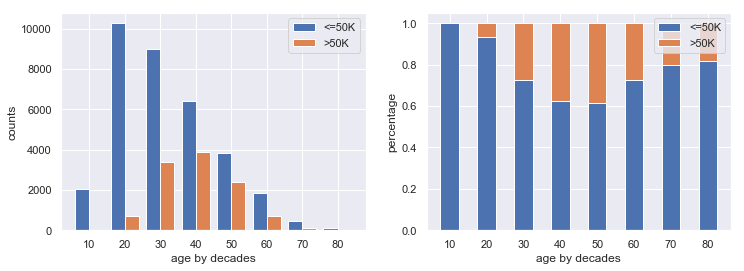

In [35]:
# age by decades
bins=np.linspace(10, 90, 9) 

# two groups
ct0, _ = np.histogram(data[data['income']=='<=50K']['age'], bins=bins)
ct1, _ = np.histogram(data[data['income']=='>50K']['age'], bins=bins)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(bins[:-1]-2, ct0, width=4, label='<=50K')
plt.bar(bins[:-1]+2, ct1, width=4, label='>50K')
plt.legend()
plt.xlabel('age by decades')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(bins[:-1], ct0/(ct0+ct1), width=5, label='<=50K')
plt.bar(bins[:-1], ct1/(ct0+ct1), width=5, bottom=ct0/(ct0+ct1), label='>50K')
plt.legend()
plt.xlabel('age by decades')
plt.ylabel('percentage')

**observation**:  
 * people younger than 20 or older than 70 make less than the rest of the population, which agrees with common sense.

### educations vs incomes

In [36]:
u, ct0 = np.unique(data[data['income']=='<=50K']['education-num'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['education-num'], return_counts=True)

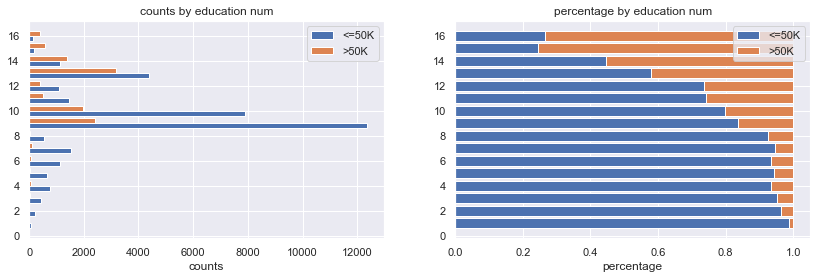

In [37]:
fig = plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.barh(u-0.2, ct0, height=0.4, label='<=50K')
plt.barh(u+0.2, ct1, height=0.4, label='>50K')
plt.legend()
plt.xlabel('counts')
plt.title('counts by education num')

plt.subplot(122)
plt.barh(u, ct0/(ct0 + ct1), label='<=50K')
plt.barh(u, ct1/(ct0 + ct1), left=ct0/(ct0 + ct1), label='>50K')
plt.legend()
plt.xlabel('percentage')
plt.title('percentage by education num')

plt.show()

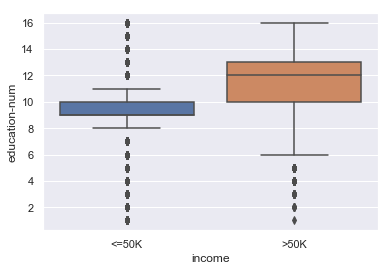

In [40]:
sns.boxplot(x = 'income', y='education-num', data=data)

**observation**:   
 *  higher educational level, higher chance of earning more than 50K

### hours-per-week  vs incomes

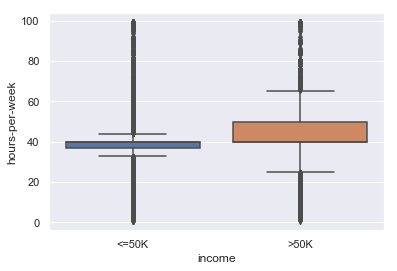

In [41]:
sns.boxplot(x = 'income', y='hours-per-week', data=data)

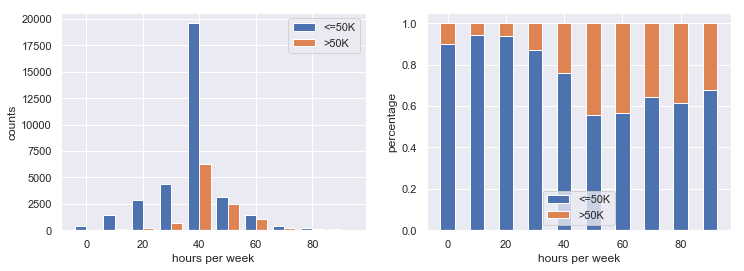

In [396]:
# hours by tens
bins=np.linspace(0, 100, 11) 

# two groups
ct0, _ = np.histogram(data[data['income']=='<=50K']['hours-per-week'], bins=bins)
ct1, _ = np.histogram(data[data['income']=='>50K']['hours-per-week'], bins=bins)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(bins[:-1]-2, ct0, width=4, label='<=50K')
plt.bar(bins[:-1]+2, ct1, width=4, label='>50K')
plt.legend()
plt.xlabel('hours per week')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(bins[:-1], ct0/(ct0+ct1), width=5, label='<=50K')
plt.bar(bins[:-1], ct1/(ct0+ct1), width=5, bottom=ct0/(ct0+ct1), label='>50K')
plt.legend()
plt.xlabel('hours per week')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * People working more than 40 hours tend to have higher incomes, which makes sense
 * are the working hours and _workclass_ significantly correlated? 

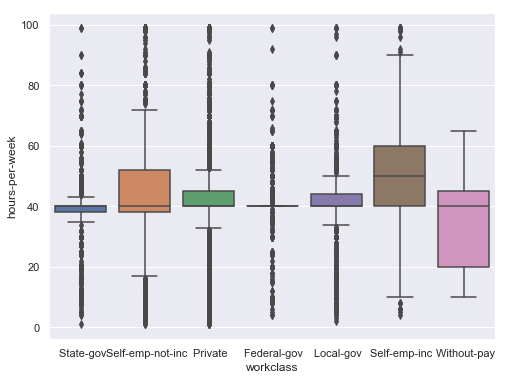

In [637]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(x='workclass', y='hours-per-week', data=data)
plt.show()

### capital investments vs incomes

from unvariate analysis we already know that most people are out of market. Here we want to know how they distribute by income class

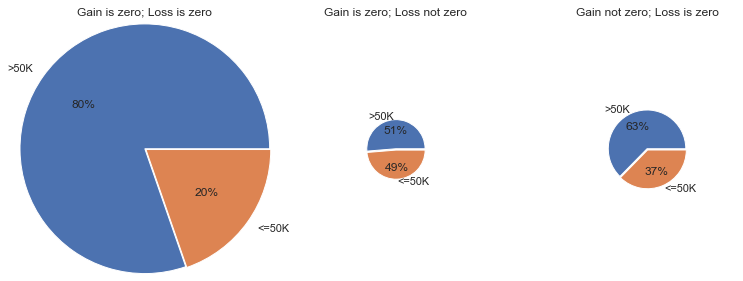

In [446]:
# three cases
# case 0: capital-gain is zero, capital-loss is zero
# case 1: capital-gain is zero, capital-loss not zero
# case 2: capital-gain not zero, capital-loss is zero

# the operator trick!
import operator as ops
x = lambda a: 'is' if a==ops.eq else 'not'

fig = plt.figure(figsize = (12,6))

for i, op in enumerate(((ops.eq, ops.eq), (ops.eq, ops.ne), (ops.ne, ops.eq))):
    count = data[op[0](data['capital-gain'],0) & op[1](data['capital-loss'],0)]['income'].value_counts()

    radius = 2*np.sqrt(np.sum(count)/data.shape[0])  # size of the pie is proportional to the size of the dataset

    ax = fig.add_subplot(1, 3, i+1)
    ax.pie(count, labels=['>50K', '<=50K'], radius=radius, autopct='%.0f%%', shadow=False, explode=(0, 0.02))
    

    ax.set_title('Gain {} zero; Loss {} zero'.format(x(op[0]), x(op[1])), loc='center', pad=50)

plt.subplots_adjust(hspace=2, wspace=0.5)

The ratios of income classes are quite different for different cases. This may suggest removing zero values or create a new category. Next, let's look at the distribution of these two features with zero values removed.

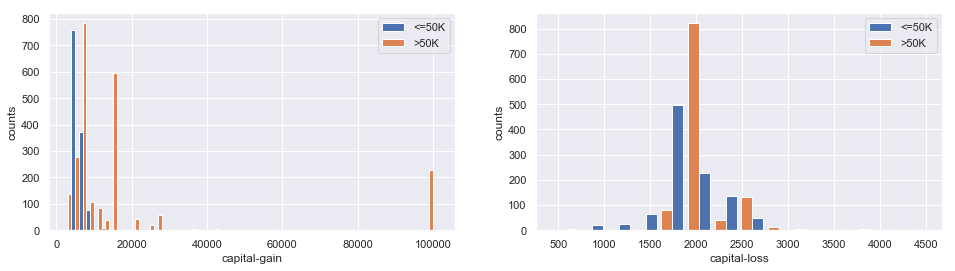

In [592]:
# plotting
fig = plt.figure(figsize=(16, 4))

for i, (ft, bin_num, width) in enumerate(zip(('capital-gain', 'capital-loss'), (51, 16), (1000, 120))):
    bins = np.linspace(data[ft].min(), data[ft].max()+1, bin_num) 

# two groups
    ct0, _ = np.histogram(data[data['income']=='<=50K'][ft], bins=bins)
    ct1, _ = np.histogram(data[data['income']=='>50K'][ft], bins=bins)

    fig.add_subplot(1,2, i+1)
    plt.bar(bins[2:]+width/2, ct0[1:], width=width, label='<=50K')
    plt.bar(bins[2:]-width/2, ct1[1:], width=width, label='>50K')
    plt.legend()
    plt.xlabel('{}'.format(ft))
    plt.ylabel('counts')

plt.show()

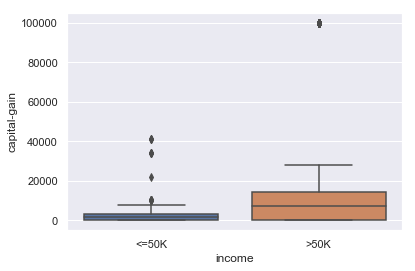

In [59]:
sns.boxplot(x = 'income', y='capital-gain', data=data[~((data['capital-gain']==0) & (data['capital-loss']==0))])

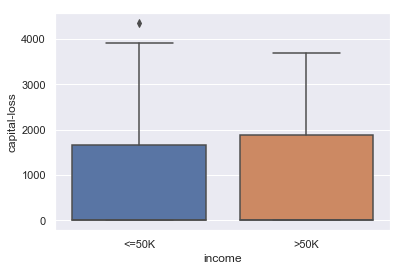

In [60]:
sns.boxplot(x = 'income', y='capital-loss', data=data[~((data['capital-gain']==0) & (data['capital-loss']==0))])

A few things came to my notice:  
 * people with high _capital-gain_ tend to earn more income; however, there're a few outliers  
 * _capital-loss_ is not a good indicator for income classes

**Observations**  
 * gain and loss are the net income from capital investment. People with zero gain and loss are simply outta market. (May consider combining these two into one, i.e., _capital = capital-gain + (-1)*capital-loss._ )  
 * The ratios of income classes are quite different when capital is not zero. This may suggest removing zero values or create a new category.  
 * Possible outliers with high _capital-gain_ but low income.

### 3.c, bivariate analysis: categorical vs categorical

The correlation between categorical features are usually quantifized by Chi-square value. Here is some good introductions: [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9) and [Chi-square and correlation](http://adata.site.wesleyan.edu/schedule/chi-square-and-correlation/).

In [8]:
import scipy.stats as ss

In [9]:
# from The Search for Categorical Correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [10]:
import itertools as it

cramers_vs = []
for i in it.product(ft_cat, repeat = 2):
    cramers_vs.append(cramers_v(data[i[0]], data[i[1]]))

cramers_vs = np.reshape(cramers_vs, (len(ft_cat),len(ft_cat)))

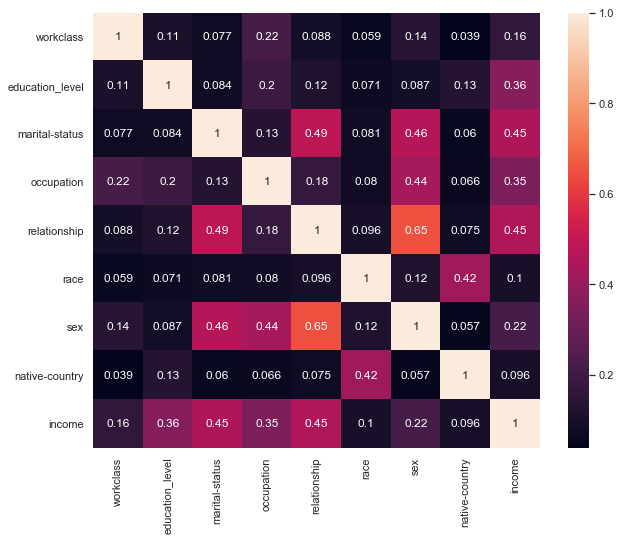

In [730]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(cramers_vs, xticklabels=ft_cat, yticklabels=ft_cat, annot=True)
plt.show()

'relationship' and 'martial-status' have the highest correlation with 'income'. Meanwhile, 'sex' has strong correlation with 'marital-status', 'occupation' and 'relationship'.

### Wrok class vs income

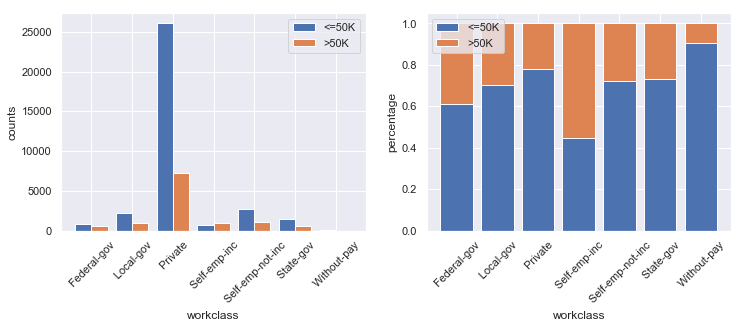

In [623]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['workclass'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['workclass'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 8)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 8)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=45)
plt.legend()
plt.xlabel('workclass')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 8), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 8), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=45)
plt.legend()
plt.xlabel('workclass')
plt.ylabel('percentage')

plt.show()

In [26]:
# only two people work as 'without-pay' actually makes more than 50K
# 'own-child' can be married too! 'marital-status' is more reliable than 'relationship'
data[(data['workclass']==' Without-pay') & (data['income']=='>50K')]

age     workclass education_level  education-num       marital-status  \
38393   64   Without-pay         HS-grad            9.0   Married-civ-spouse   
40001   50   Without-pay         HS-grad            9.0   Married-civ-spouse   

               occupation relationship    race      sex  capital-gain  \
38393   Handlers-cleaners      Husband   White     Male           0.0   
40001   Machine-op-inspct    Own-child   White   Female           0.0   

       capital-loss  hours-per-week  native-country income  income_binary  
38393           0.0            60.0   United-States   >50K              1  
40001        1887.0            40.0   United-States   >50K              1

**Observations** 

Apparently, we have a lot of 'private' workers. This give me a better understanding of the classes:  
 * low correlation with 'income'; low correlation with all other features; may consider split into bigger groups   
 * 'gov' related: federal level has higher income than local and state  
 * 'private' is privately owned companies, they make up most of the population and has the 2nd lowest >50K proportion.  
 * the difference between 'self-emp-inc' and 'self-emp-not-inc' are summarized in this [article](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html).  

### Occupation vs Income

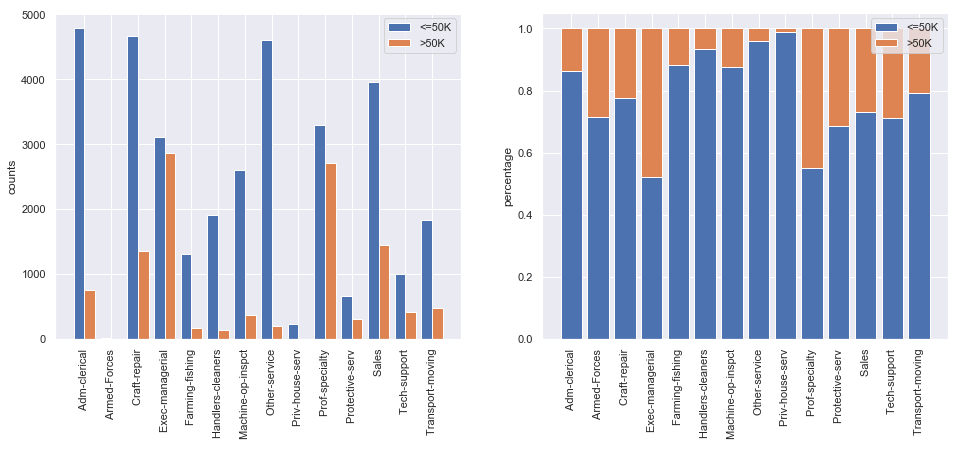

In [85]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['occupation'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['occupation'], return_counts=True)

# plotting
fig = plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.bar(np.arange(1, 15)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 15)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 15), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 15), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 15), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 15), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * relation with workclass?

In [722]:
xtab = pd.crosstab(data['workclass'], data['occupation'])  # nice trick, 'crosstab'
xtab = xtab/xtab.sum() # normalize within each occupation
print(type(xtab))
xtab

<class 'pandas.core.frame.DataFrame'>


occupation          Adm-clerical   Armed-Forces   Craft-repair  \
workclass                                                        
 Federal-gov            0.087726            1.0       0.015282   
 Local-gov              0.075090            0.0       0.034551   
 Private                0.749278            0.0       0.777741   
 Self-emp-inc           0.007942            0.0       0.026246   
 Self-emp-not-inc       0.012455            0.0       0.130565   
 State-gov              0.066968            0.0       0.015449   
 Without-pay            0.000542            0.0       0.000166   

occupation          Exec-managerial   Farming-fishing   Handlers-cleaners  \
workclass                                                                   
 Federal-gov               0.044285          0.006081            0.017107   
 Local-gov                 0.054980          0.029054            0.031281   
 Private                   0.657420          0.447973            0.928152   
 Self-emp-inc              0.100267          0.055405            0.002933   
 Self-emp-not-inc          0.095922          0.439865            0.010264   
 State-gov                 0.046959          0.016216            0.009286   
 Without-pay               0.000167          0.005405            0.000978   

occupation          Machine-op-inspct   Other-service   Priv-house-serv  \
workclass                                                                 
 Federal-gov                 0.006397        0.011231               0.0   
 Local-gov                   0.007407        0.061356               0.0   
 Private                     0.954882        0.821755               1.0   
 Self-emp-inc                0.004714        0.008735               0.0   
 Self-emp-not-inc            0.019529        0.056988               0.0   
 State-gov                   0.006397        0.039517               0.0   
 Without-pay                 0.000673        0.000416               0.0   

occupation          Prof-specialty   Protective-serv     Sales   Tech-support  \
workclass                                                                       
 Federal-gov              0.039780          0.047131  0.003143       0.066197   
 Local-gov                0.173768          0.460041  0.002959       0.040845   
 Private                  0.550932          0.301230  0.808802       0.797183   
 Self-emp-inc             0.040280          0.005123  0.075259       0.006338   
 Self-emp-not-inc         0.093542          0.007172  0.106139       0.029577   
 State-gov                0.101698          0.179303  0.003513       0.059859   
 Without-pay              0.000000          0.000000  0.000185       0.000000   

occupation          Transport-moving  
workclass                             
 Federal-gov                0.015544  
 Local-gov                  0.067358  
 Private                    0.798359  
 Self-emp-inc               0.015976  
 Self-emp-not-inc           0.076857  
 State-gov                  0.025475  
 Without-pay                0.000432

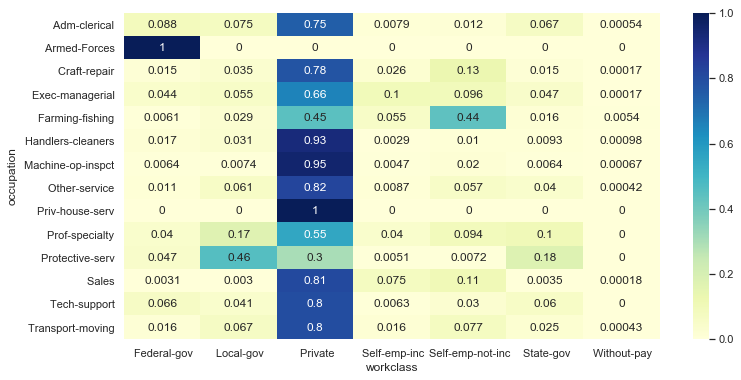

In [723]:
fig = plt.figure(figsize=(12, 6))
sns.heatmap(xtab.T, annot=True, cmap="YlGnBu")
plt.show()

For most occupations, 'private' section makes up most of the population, which renders the correlation between 'workclass' and 'occupation' not useful.

### marital-status vs income

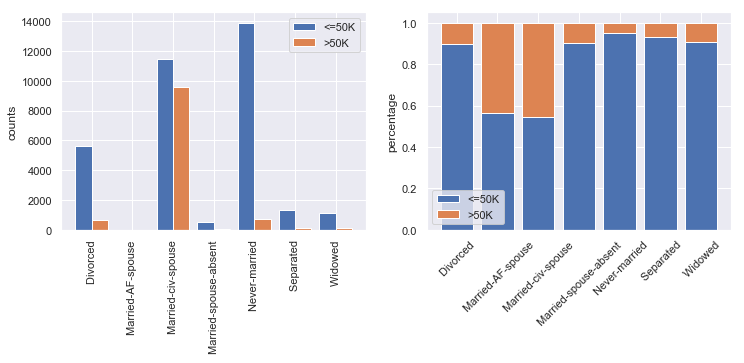

In [84]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['marital-status'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['marital-status'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 8)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 8)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 8), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 8), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=45)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

**observations**  
 * Married-AF-spouse = Armed Forces, Married-civ-spouse = Civilian   
 * see how 'Married-civ-spouse' earns way more than any other category? We are dealing with **househould** income!  
 * So the person listed is the bread winner of the household? Do we have people from the same family? (We can **ASSUME** there is none, coz there's no way to tell from the data)


### relationship vs incomes

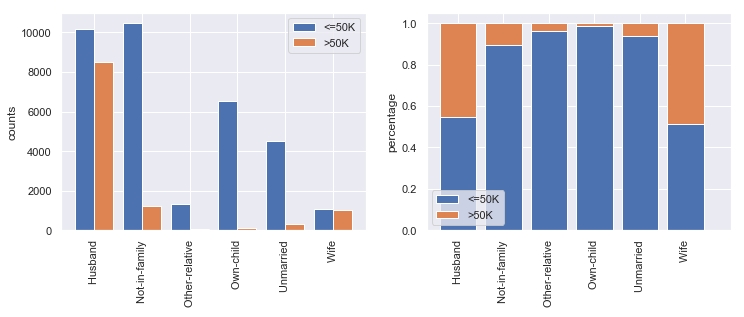

In [650]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['relationship'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['relationship'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 7)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 7)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 7), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 7), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 7), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 8), labels=u, rotation=90)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

In [74]:
data[(data['relationship']==' Own-child') & (data['marital-status']==' Married-civ-spouse')]['income'].value_counts()

<=50K    103
>50K      22
Name: income, dtype: int64

**Observations**  
 * People who are listed as 'Own-child' are single; 'Other-relative' might be grandparents.  
 * See how similar is the ratio between 'Husband', 'Wife' and 'Married-civ-spouse'? 'relationship' and 'Marital-status' actually have the same correlation with 'income'.
 * We can actually divide this feature into 'complete' and 'incomplete' where the former overlaps with 'Married'. Therefore we can **combine 'relationship' and 'Martial-Status'**  

### race vs incomes

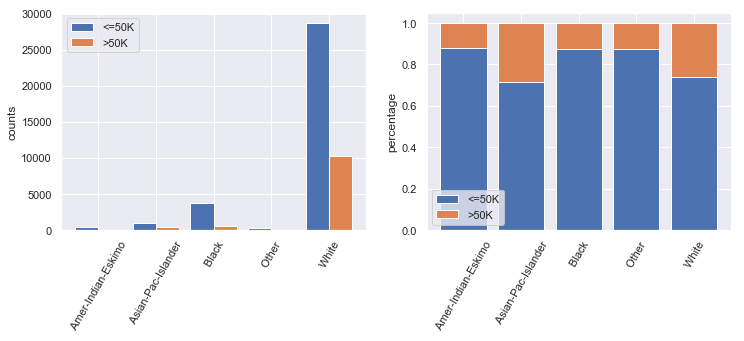

In [712]:
# two groups
u, ct0 = np.unique(data[data['income']=='<=50K']['race'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['race'], return_counts=True)

# plotting
fig = plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(1, 6)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 6)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 6), labels=u, rotation=60)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('counts')

plt.subplot(122)
plt.bar(np.arange(1, 6), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 6), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 6), labels=u, rotation=60)
plt.legend()
#plt.xlabel('marital-status')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * 'Hispanic' is NOT considered as a race (https://en.wikipedia.org/wiki/Hispanic)
 * Current racial distribution in the US from national [demographics](https://statisticalatlas.com/United-States/Race-and-Ethnicity).   
 * Asians are most likely to have income great than 50K, trailled by Whites.

###  Sex

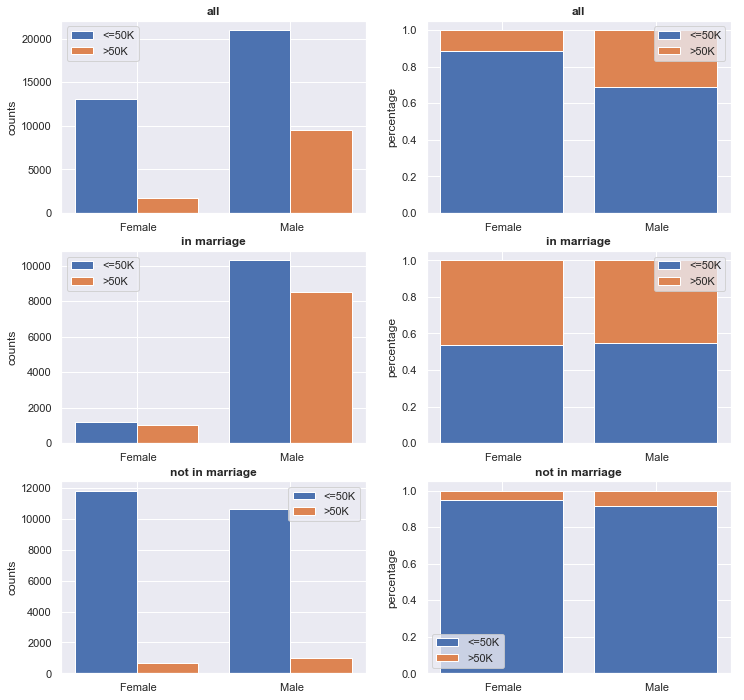

In [767]:
fig = plt.figure(figsize=(12, 12))

u, ct0 = np.unique(data[data['income']=='<=50K']['sex'], return_counts=True)
_, ct1 = np.unique(data[data['income']=='>50K']['sex'], return_counts=True)

plt.subplot(321)
plt.bar(np.arange(1, 3)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 3)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 3), labels=u, rotation=0)
plt.legend()
plt.title('all', fontweight='bold')
plt.ylabel('counts')

plt.subplot(322)
plt.bar(np.arange(1, 3), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 3), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 3), labels=u, rotation=0)
plt.legend()
plt.title('all', fontweight='bold')
plt.ylabel('percentage')

tmp = data[data['marital-status'].isin([' Married-civ-spouse', ' Married-af-spouse'])]
u, ct0 = np.unique(tmp[tmp['income']=='<=50K']['sex'], return_counts=True)
_, ct1 = np.unique(tmp[tmp['income']=='>50K']['sex'], return_counts=True)

plt.subplot(323)
plt.bar(np.arange(1, 3)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 3)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 3), labels=u, rotation=0)
plt.legend()
plt.title('in marriage', fontweight='bold')
plt.ylabel('counts')

plt.subplot(324)
plt.bar(np.arange(1, 3), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 3), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 3), labels=u, rotation=0)
plt.legend()
plt.title('in marriage', fontweight='bold')
plt.ylabel('percentage')

tmp = data[~data['marital-status'].isin([' Married-civ-spouse', ' Married-af-spouse'])]
u, ct0 = np.unique(tmp[tmp['income']=='<=50K']['sex'], return_counts=True)
_, ct1 = np.unique(tmp[tmp['income']=='>50K']['sex'], return_counts=True)

plt.subplot(325)
plt.bar(np.arange(1, 3)-0.2, ct0, width=0.4, label='<=50K')
plt.bar(np.arange(1, 3)+0.2, ct1, width=0.4, label='>50K')
plt.xticks(ticks=np.arange(1, 3), labels=u, rotation=0)
plt.legend()
plt.title('not in marriage', fontweight='bold')
plt.ylabel('counts')

plt.subplot(326)
plt.bar(np.arange(1, 3), ct0/(ct0+ct1), width=0.8, label='<=50K')
plt.bar(np.arange(1, 3), ct1/(ct0+ct1), width=0.8, bottom=ct0/(ct0+ct1), label='>50K')
plt.xticks(ticks=np.arange(1, 3), labels=u, rotation=0)
plt.legend()
plt.title('not in marriage', fontweight='bold')
plt.ylabel('percentage')

plt.show()

**Observations**  
 * apparently, males have better chance to make income greater than 50K.  
 * however, when grouped by marital status, they are very similar. A lotta single moms are not doing well!

### Bivariate Analysis Summary

 * no obvious correlation or scattering pattern observed between numerical features
 * what to do with numerical features?  

| Step               	| Observation                                                                                                                                                                                                                       	| Idea                                                                                                                           	|
|--------------------	|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------	|
| **ages**           	| people younger than 20 or older than 70 make less than the rest of the population                                                                                                                                                 	|                                                                                                                                	|
| **education**      	| higher chance of earning more than 50K                                                                                              	|                                                                                                                                	|
| **capitals**       	| is not a good indicator for income classification<br>The ratios of income classes are quite different when capital is not zero 	| feature engineering to combine gain and loss so that we can extract more info?<br>ignore zero values or create a new category? 	|
| **hours-per-week** 	| more than 40 hours, higher incomes                                                                                                                                                                                                	| no strong correlation with workclass                                                                                                    	|
| **workclass**      	| 'self-emp-inc' has the highest chance of '>50K'                                                                                                                                                                                   	|                                                                  low correlation with all other features; may consider split into bigger groups      	|
| **marital-status** 	| We are dealing with **househould** income                                                                                                                                                                                         	|                                                                       	|
| **relationship**   	| People who are listed as 'Own-child' can be married, 'martial-status' is more reliable<br>'Other-relative' might be grandparents                                                                                                                                         	| may combine 'relationship' and 'Martial-Status'                                                                                	|
| **occupation**     	| strong indicator                                                                                                                                                                                                                  	| combine into fewer groups?                                                                                                     	|
| **race**           	| Hispanic is not a race<br>Asians are most likely to have income great than 50K, trailled by Whites.                                                                                                                               	|                                                                                                                                	|
| **sex**            	| male more likely to higher income<br>martial status matters a lot                                                                                                                                                                 	| combine with martial status?                                                                                                                               	|
| **native-country** 	| over 90% are from USA<br>The ratio of income classes are similar between people of US origin and people from all origins                                                                                                          	| can be ignored?                                                                                                                	|

-----

## Knowledge and Tricks

### 'pd.crosstab' for 2D counting

### plotting tricks 

I have not found an efficient way to generate the percentage plot grouped by class using `seaborn`. As a result I followed these steps and used _plt.bar()_:  
 * `ct = np.hist(bins)` to count the frequency of binned value  
 * `plt.bar(ct.class0, x-width/2, bins), plt.bar(ct.class1, x+width/2, bins)` to plot classes side by side 
 * `plt.bar(ct.class0, x), plt.bar(ct.class1, x, bottom=ct.class0)` to plot classes stacked

### bivariate analysis: [categorical vs numerical](https://www.saedsayad.com/categorical_numerical.htm)  

In general, we can ask where the difference beween averages of groups (e.g., 'Male' and 'Female') of some numerical feature (e.g., 'capital-gain') is significant or not. The usual statistical tools are _Z-test_ (for two categories) and _ANOVA_ (for more than two.)     

In our case, coz no obvious pattern was found between numerical features, we shall see if they behave differents when income class is different.

In [45]:
# As an example, let's check 'hours-per-week' against different 'sex'
# apparently the zero P value indicates significant difference in averages

sexs = pd.unique(data['sex'].values)
d_data = {sex:data['hours-per-week'][data['sex']==sex] for sex in sexs}

f, p = ss.stats.f_oneway(d_data[' Male'], d_data[' Female'])
f, p

(2558.9124323790147, 0.0)

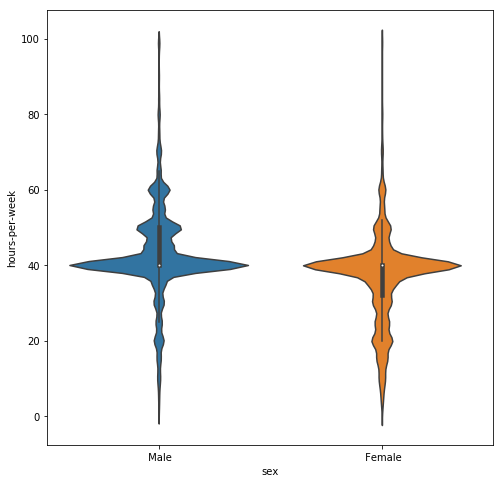

In [59]:
# double check with a box plot

fig = plt.figure(figsize=(8, 8))
sns.violinplot(x='sex', y='hours-per-week', data=data,  inner="box")
plt.show()

**Cons**  
 * Assumptions hard to meet  
 * Cannot pinpoint the exact feature when there're more than two of them  
 * Can be replaced by visualizations

 [ref 1](http://scg.sdsu.edu/dataset-adult_r/)
 * Capital-gain/loss into low/high groups
 * combine government works; self-employed...  
 * 'occupation' to 'blue collar' and 'white collar'  
 * 'native-cournty' into continents  
 * scaling/normalizing features  
 * put all feature engineering into a function

[ref 2](https://faculty.biu.ac.il/~yahavi1/Projects/CP2010T1_rep.pdf)  
 * visualize DT  
 * average hours-per-week w.r.t. Gender (married or not)  
 * check predictive error in different classes  

[ref3](http://rstudio-pubs-static.s3.amazonaws.com/265200_a8d21a65d3d34b979c5aafb0de10c221.html)  
Capital gain:

We mark all values of “capital_gain” which are less than the first quartile of the nonzero capital gain (which is equal to 3464) as “Low”; all values that are between the first and third quartile (between 3464 and 14080) - as “Medium”; and all values greater than or equal to the third quartile are marked as “High”.


Asia_East <- c(" Cambodia", " China", " Hong", " Laos", " Thailand",
               " Japan", " Taiwan", " Vietnam")

Asia_Central <- c(" India", " Iran")

Central_America <- c(" Cuba", " Guatemala", " Jamaica", " Nicaragua", 
                     " Puerto-Rico",  " Dominican-Republic", " El-Salvador", 
                     " Haiti", " Honduras", " Mexico", " Trinadad&Tobago")

South_America <- c(" Ecuador", " Peru", " Columbia")


Europe_West <- c(" England", " Germany", " Holand-Netherlands", " Ireland", 
                 " France", " Greece", " Italy", " Portugal", " Scotland")

Europe_East <- c(" Poland", " Yugoslavia", " Hungary")

 * unbalanced classes

 * binning unevenly distributed continuous feature?

In [54]:
tmp = data[~((data['capital-gain']==0) & (data['capital-loss']==0))]

In [56]:
corr = tmp[['capital-gain', 'capital-loss', 'income_binary']].corr()
corr.style.background_gradient(cmap='Accent')